 <img src="diabetes.jpg" alt="diabetes image">
<div>
  <h2>Key Details about the Pima Indians Diabetes Database</h2>
  <ul>
    <li>
      <strong>Origin:</strong> The dataset was originally collected by the National Institute of Diabetes and Digestive and Kidney Diseases (NIDDK) in collaboration with the Pima Indian community in Arizona, United States. It was collected to study the onset of diabetes among Pima Native Americans.
    </li>
    <li>
      <strong>Contents:</strong> The dataset contains various health-related attributes of Pima Indian individuals, including:
      <ul>
        <li>Age</li>
        <li>Number of pregnancies</li>
        <li>Plasma glucose concentration</li>
        <li>Diastolic blood pressure</li>
        <li>Triceps skinfold thickness</li>
        <li>Serum insulin level</li>
        <li>Body mass index (BMI)</li>
        <li>Diabetes pedigree function</li>
        <li>Outcome (1 for diabetes diagnosis, 0 for non-diabetes)</li>
      </ul>
    </li>
  </ul>
</div>


# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

# Importing Data 

In [2]:
df_diabetes = pd.read_csv("diabetes.csv")

In [3]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# EDA

In [4]:
df_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df_diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


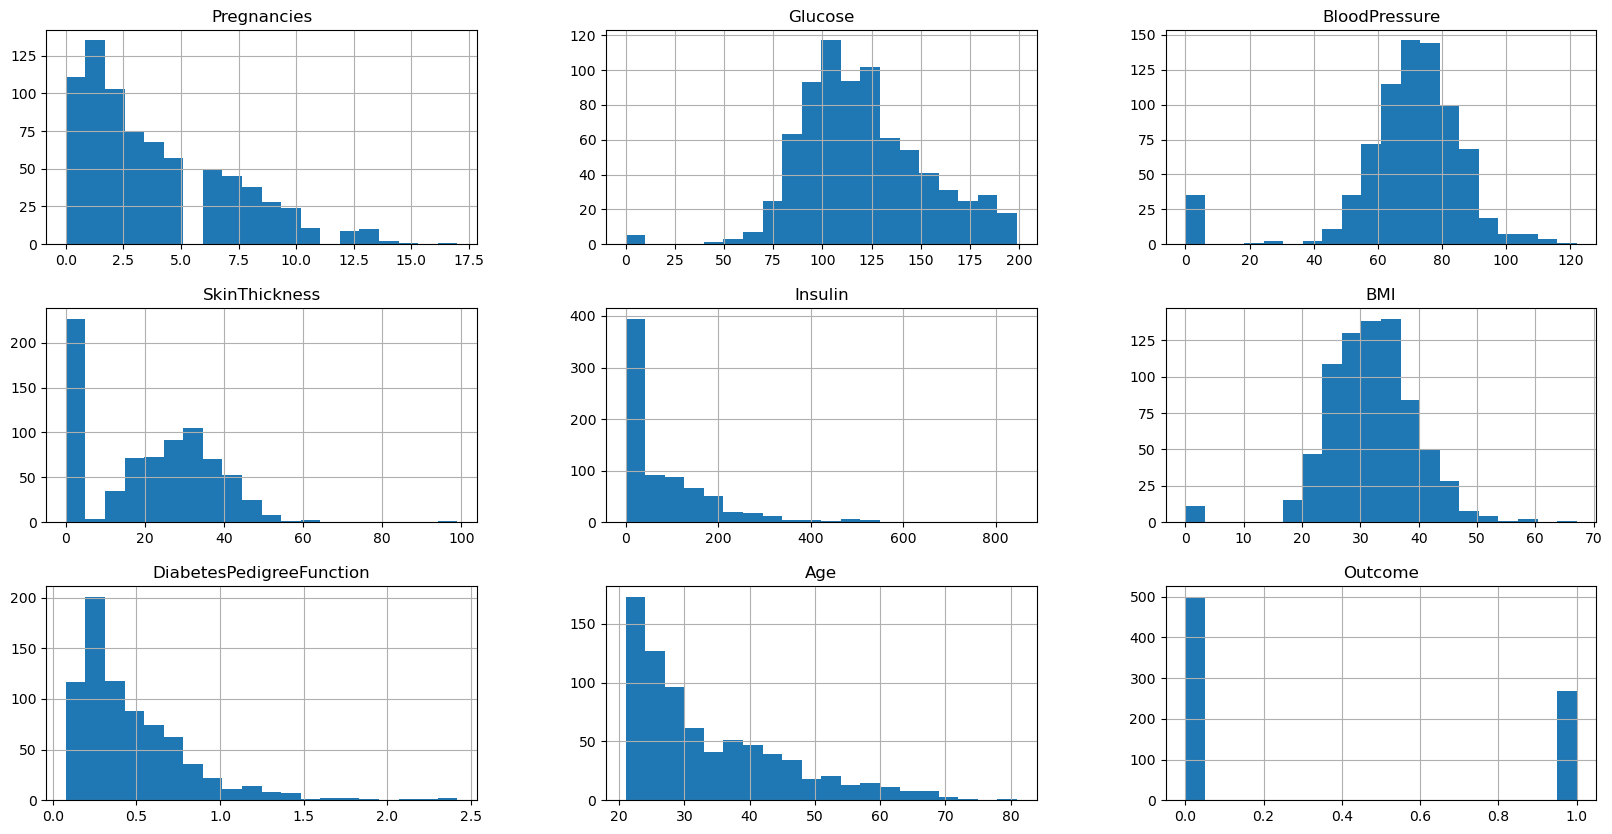

In [6]:
df_diabetes.hist(bins=20,figsize=(20,10))
plt.show()

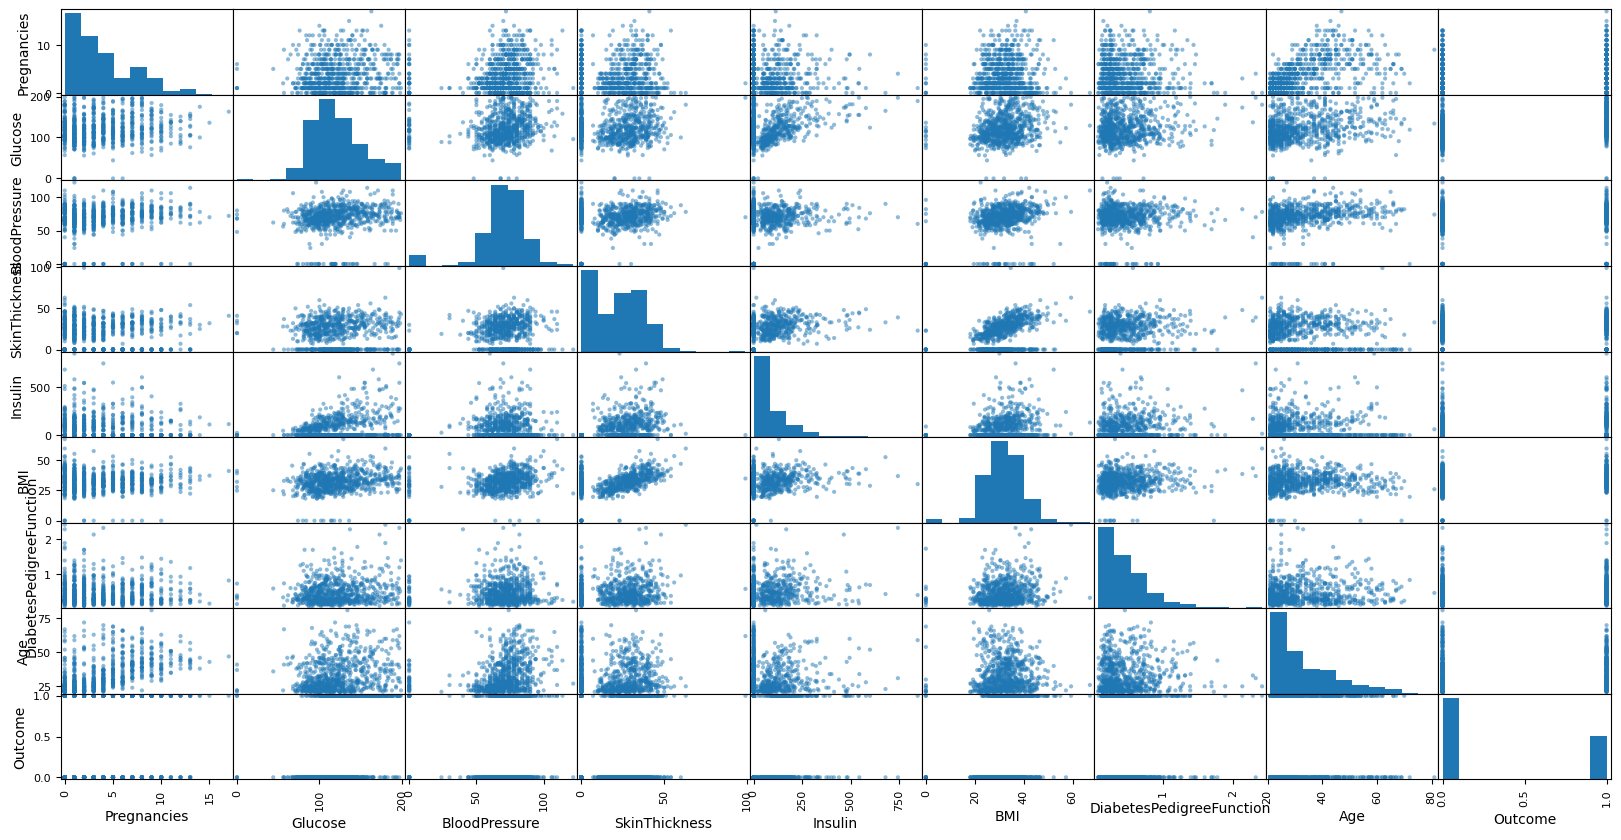

In [7]:
pd.plotting.scatter_matrix(df_diabetes,figsize=(20,10))
plt.show()

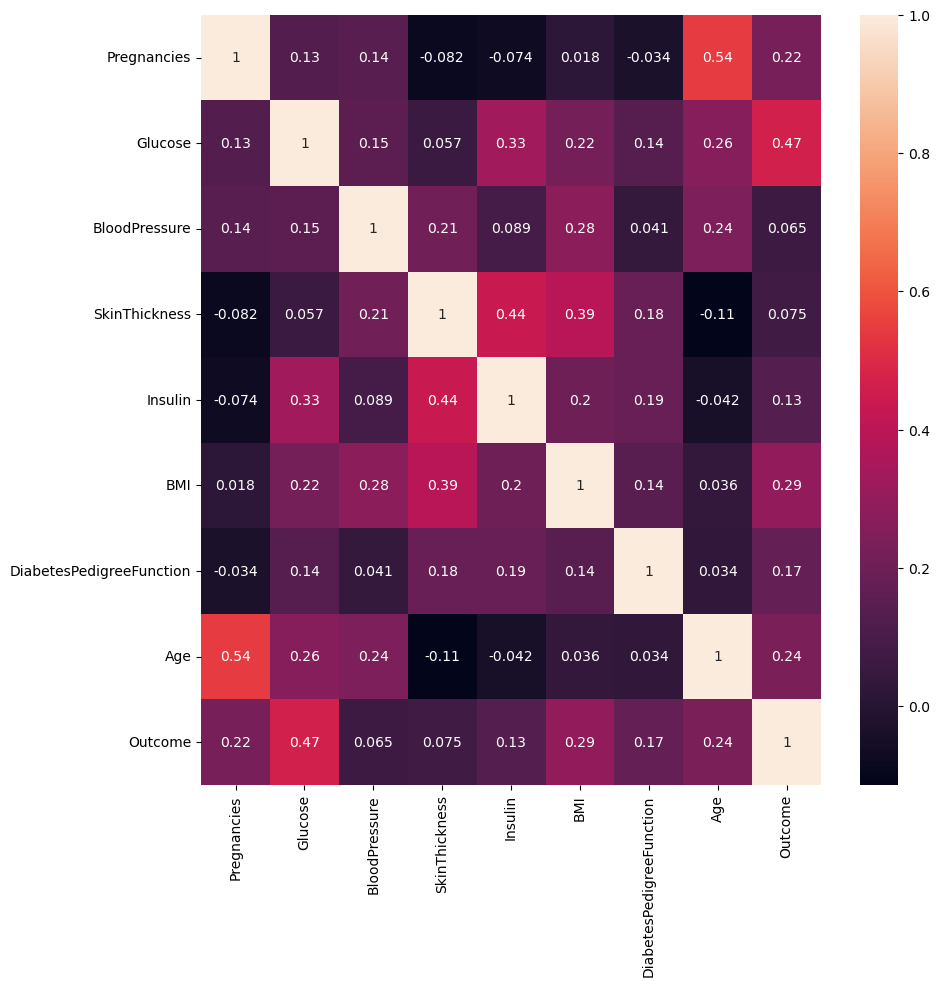

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df_diabetes.corr(), annot=True)
plt.show()

# Splitting Data

In [9]:
X = df_diabetes.iloc[:,:-1].values

In [10]:
y = df_diabetes.iloc[:,-1].values

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building and Testing Model

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

### Initialize classifiers

In [14]:
decision_tree = DecisionTreeClassifier()
random_forest = RandomForestClassifier()
svm = SVC()
logistic = LogisticRegression()
xgboost = XGBClassifier()

### Define parameter grids for each classifier

In [15]:
param_grid_decision_tree = {'max_depth': [3, 5, 7]}
param_grid_random_forest = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10]}
param_grid_logistic = {'C': [0.1, 1, 10]}
param_grid_xgboost = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}

### Grid search for each classifier

In [16]:
classifiers = [('Decision Tree', decision_tree, param_grid_decision_tree),
               ('Random Forest', random_forest, param_grid_random_forest),
               ('SVM', svm, param_grid_svm),
               ('Logistic Regression', logistic, param_grid_logistic),
               ('XGBoost', xgboost, param_grid_xgboost)]

for name, classifier, param_grid in classifiers:
    grid_search = GridSearchCV(classifier, param_grid, cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {name}: {grid_search.best_score_:.2f}")
    print(f"Test set ROC AUC for {name}: {grid_search.score(X_test, y_test):.2f}\n")

Best parameters for Decision Tree: {'max_depth': 3}
Best cross-validation score for Decision Tree: 0.82
Test set ROC AUC for Decision Tree: 0.79

Best parameters for Random Forest: {'max_depth': 7, 'n_estimators': 200}
Best cross-validation score for Random Forest: 0.84
Test set ROC AUC for Random Forest: 0.83

Best parameters for SVM: {'C': 1, 'gamma': 0.1}
Best cross-validation score for SVM: 0.65
Test set ROC AUC for SVM: 0.65

Best parameters for Logistic Regression: {'C': 10}
Best cross-validation score for Logistic Regression: 0.83
Test set ROC AUC for Logistic Regression: 0.82

Best parameters for XGBoost: {'max_depth': 3, 'n_estimators': 50}
Best cross-validation score for XGBoost: 0.84
Test set ROC AUC for XGBoost: 0.79



### choosing Random Forest Estimator

In [17]:
RFC = RandomForestClassifier(n_estimators=200,max_depth=7)
LOG = LogisticRegression(C= 10)

In [18]:
RFC.fit(X_train,y_train)
LOG.fit(X_train,y_train)

LogisticRegression(C=10)

In [19]:
from sklearn.model_selection import cross_val_predict
y_train_pred_RFC = cross_val_predict(RFC, X_train, y_train, cv=3)
y_train_pred_LOG= cross_val_predict(RFC, X_train, y_train, cv=3)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
confusion_matrix(y_train, y_train_pred_RFC)

array([[349,  52],
       [ 89, 124]], dtype=int64)

In [21]:
confusion_matrix(y_train, y_train_pred_LOG)

array([[355,  46],
       [ 90, 123]], dtype=int64)

In [22]:
print(classification_report(y_train, y_train_pred_RFC))
print(classification_report(y_train, y_train_pred_LOG))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       401
           1       0.70      0.58      0.64       213

    accuracy                           0.77       614
   macro avg       0.75      0.73      0.73       614
weighted avg       0.76      0.77      0.76       614

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       401
           1       0.73      0.58      0.64       213

    accuracy                           0.78       614
   macro avg       0.76      0.73      0.74       614
weighted avg       0.77      0.78      0.77       614



In [31]:
accuracy_score(y_train, y_train_pred_RFC)

0.7703583061889251

In [32]:
accuracy_score(y_train, y_train_pred_LOG)

0.7785016286644951

In [25]:
y_pred_FRC = RFC.predict(X_test)
y_pred_LOG = LOG.predict(X_test)

In [26]:
confusion_matrix(y_test, y_pred_FRC)

array([[78, 21],
       [20, 35]], dtype=int64)

In [27]:
confusion_matrix(y_test, y_pred_LOG)

array([[80, 19],
       [18, 37]], dtype=int64)

In [28]:
print(classification_report(y_test, y_pred_FRC))
print(classification_report(y_test, y_pred_LOG))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

              precision    recall  f1-score   support

           0       0.82      0.81      0.81        99
           1       0.66      0.67      0.67        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



In [29]:
accuracy_score(y_test, y_pred_FRC)

0.7337662337662337

In [30]:
accuracy_score(y_test, y_pred_LOG)

0.7597402597402597

# Model Deployment

In [33]:
import pickle
with open("model.pkl", "wb") as file:
    pickle.dump(LOG, file)

# Thanks